In [1]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Collection and Preparation

In [2]:
# req_cols = ['latitiude','longitude','price','minimum_nights','number_of_reviews',
#             'reviews_per_month','calculated_host_listing_count','availability_365']

data = pd.read_csv('../data/housing.csv')
 
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
features = list(data.select_dtypes(['int64','float64']).columns)
features = [col for col in features if col != 'median_house_value']
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

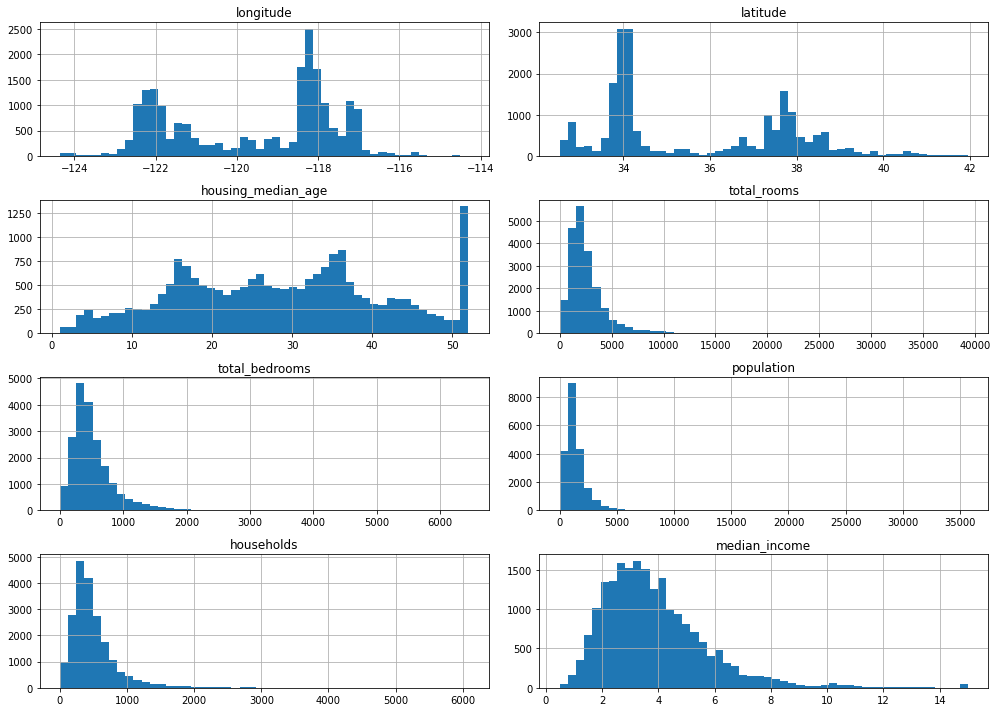

In [6]:
fig = plt.figure(figsize=(14,10))
ax = plt.gca()
data.hist(bins=50, ax = ax, layout = (4,2), column=features)
plt.tight_layout()
plt.show()

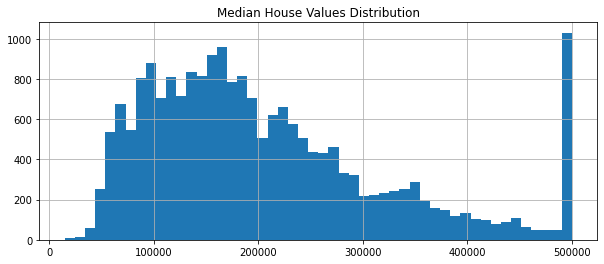

In [7]:
data.median_house_value.hist(bins=50, figsize=(10,4))
plt.title('Median House Values Distribution')
plt.show()

## Q1
Find a feature with missing values

In [8]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Q2
What's the median (50% percential) for the variable 'population'?

In [9]:
data.population.median()

1166.0

## Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the numpy.log1p() function.

In [10]:
k = len(data)
k_val = int(0.2*k)
k_test = int(0.2*k)
k_train = k-(k_val+k_test)

In [11]:
idx = numpy.arange(k)
numpy.random.seed(42)
numpy.random.shuffle(idx)

In [12]:
df_train = data.iloc[idx[:k_train]]
df_val = data.iloc[idx[k_train:k_train+k_val]]
df_test = data.iloc[idx[k_train+k_val:]]

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = numpy.log1p(df_train.median_house_value.values)
y_val = numpy.log1p(df_val.median_house_value.values)
y_test = numpy.log1p(df_test.median_house_value.values)

In [15]:
del df_train['median_house_value'], df_val['median_house_value'], df_test['median_house_value']

## Q3
- You need to deal with missing values for the column from Q1.
- You have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

__Options__: 
- With 0
- With mean
- Both are equally good

### With 0

make sure that the missing values are in the df_train only

In [16]:
df_train.total_bedrooms.isna().sum()

207

In [17]:
df_val.total_bedrooms.isna().sum()

0

In [18]:
df_test.total_bedrooms.isna().sum()

0

In [19]:
base = list(data.select_dtypes(['int64','float64']).columns)
base = [col for col in base if col != 'median_house_value']
base

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [20]:
def prepare_X_0(df):
    df1 = df.copy()
    features = base.copy()
    
#     for val in list(data.ocean_proximity.value_counts().index):
#         df1[f'ocean_proxitmity_{val}'] = (df1.ocean_proximity == val).astype(int)
#         features.append(f'ocean_proxitmity_{val}')
        
    df_num = df1[features]
    df_num.total_bedrooms.fillna(0, inplace=True)
    X = df_num.values

    
    return X

In [21]:
def train_linear_regression(X,y):
    ones = numpy.ones(X.shape[0])
    X = numpy.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = numpy.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return numpy.sqrt(mse)

In [23]:
X_train_0 = prepare_X_0(df_train)

In [24]:
w0,w = train_linear_regression(X_train_0,y_train)

In [25]:
X_val = prepare_X_0(df_val)

In [26]:
y_pred = w0 + X_val.dot(w)

In [27]:
rmse(y_val, y_pred)

0.3295330365223576

### With mean

In [28]:
def prepare_X_mean(df):
    df1 = df.copy()
    features = base.copy()
    
#     for val in list(data.ocean_proximity.value_counts().index):
#         df1[f'ocean_proxitmity_{val}'] = (df1.ocean_proximity == val).astype(int)
#         features.append(f'ocean_proxitmity_{val}')
        
    df_num = df1[features]
    _mean = df_num.total_bedrooms.mean()
    df_num.total_bedrooms.fillna(_mean, inplace=True)
    X = df_num.values

    return X

In [29]:
X_train_mean = prepare_X_mean(df_train)

In [30]:
w0,w = train_linear_regression(X_train_mean,y_train)

In [31]:
X_val = prepare_X_mean(df_val)

In [32]:
y_pred = w0 + X_val.dot(w)

In [33]:
rmse(y_val, y_pred)

0.32901954390052734

In [34]:
0.3295330365223576 > 0.32901954390052734

True

Filling the missing values with mean results in better rmse

## Q4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

__Options__:

- 0
- 0.000001
- 0.001
- 0.0001

In [35]:
def train_linear_regression_reg(X,y,r):
    ones = numpy.ones(X.shape[0])
    X = numpy.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + (r*numpy.eye(XTX.shape[0]))
    
    XTX_inv = numpy.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [36]:
X_train = prepare_X_0(df_train)

In [37]:
X_val = prepare_X_0(df_val)

In [38]:
results = {'r':[],'w0':[],'rmse':[]}

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 0, 1, 5, 10]:
    w0,w = train_linear_regression_reg(X_train,y_train,r)
    y_pred = w0 + X_val.dot(w)
    se = (y_val-y_pred)**2
    mse = se.mean()
    rmse = numpy.sqrt(mse)
    
    results['r'].append(r)
    results['w0'].append(w0)
    results['rmse'].append(rmse)
    print(str(r),'  ',str(w0),'  ',str(rmse))

1e-06    -11.68695917591737    0.32953303616452034
0.0001    -11.685368865007995    0.3295330009704729
0.001    -11.670931317358162    0.32953270386742145
0.01    -11.528493585578696    0.3295319365989487
0.1    -10.274500281830704    0.3296947205398725
0    -11.686975241364406    0.3295330365223576
1    -4.920480897735419    0.33378872200043475
5    -1.4820957456558748    0.33924853455032267
10    -0.7899311832126873    0.3406063807809193


In [39]:
results_df = pd.DataFrame(results).sort_values('rmse', ascending=True)
results_df

,r,w0,rmse
3,0.010000,-11.528494,0.329532
2,0.001000,-11.670931,0.329533
1,0.000100,-11.685369,0.329533
0,0.000001,-11.686959,0.329533
5,0.000000,-11.686975,0.329533
4,0.100000,-10.274500,0.329695
6,1.000000,-4.920481,0.333789
7,5.000000,-1.482096,0.339249
8,10.000000,-0.789931,0.340606


r = 0.01 provides the best rmse

## Q5
- You used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [40]:
q5_results = {'seed':[],'rmse':[]}
# k = len(data)
# k_val = int(0.2*k)
# k_test = int(0.2*k)
# k_train = k-(k_val+k_test)

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = numpy.arange(k)
    numpy.random.seed(seed)
    numpy.random.shuffle(idx)
    
    df_train = data.iloc[idx[:k_train]]
    df_val = data.iloc[idx[k_train:k_train+k_val]]
    df_test = data.iloc[idx[k_train+k_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = numpy.log1p(df_train.median_house_value.values)
    y_val = numpy.log1p(df_val.median_house_value.values)
    y_test = numpy.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value'] 
    del df_test['median_house_value']
    
    X_train = prepare_X_0(df_train)
    X_val = prepare_X_0(df_val)
    
    w0,w = train_linear_regression(X_train,y_train)
    y_pred = w0 + X_val.dot(w)
    se = (y_val-y_pred)**2
    mse = se.mean()
    rmse = numpy.sqrt(mse)
    
    q5_results['seed'].append(seed)
    q5_results['rmse'].append(rmse)

In [41]:
q5_results_df = pd.DataFrame(q5_results).sort_values('rmse')
q5_results_df

,seed,rmse
2,2,0.332091
1,1,0.336239
9,9,0.336593
0,0,0.338843
4,4,0.338902
7,7,0.339599
3,3,0.340515
5,5,0.343487
6,6,0.345198
8,8,0.346623


In [45]:
round(numpy.std(q5_results_df.rmse.values),3)

0.004

The standard deviation is close to 0.005

## Q6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

__Options__:
- 0.35
- 0.135
- 0.450
- 0.245

In [44]:
idx = numpy.arange(k)
numpy.random.seed(9)
numpy.random.shuffle(idx)

df_train = data.iloc[idx[:k_train]]
df_val = data.iloc[idx[k_train:k_train+k_val]]
df_test = data.iloc[idx[k_train+k_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = numpy.log1p(df_train.median_house_value.values)
y_val = numpy.log1p(df_val.median_house_value.values)
y_test = numpy.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value'] 
del df_test['median_house_value']

X_train = prepare_X_0(df_train)
X_val = prepare_X_0(df_val)
X_test = prepare_X_0(df_test)

X_train_full = numpy.concatenate([X_train,X_val],axis= 0)
y_train_full = numpy.concatenate([y_train,y_val],axis= 0)


w0,w = train_linear_regression_reg(X_train_full,y_train_full,0.001)
y_pred = w0 + X_test.dot(w)
se = (y_test-y_pred)**2
mse = se.mean()
rmse = numpy.sqrt(mse)
print(rmse)

0.34531689143657907


The rmse is close to 0.35